# old dataset

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage.feature import graycomatrix, graycoprops # Change graycomatrix and graycoprops to graycomatrix and graycoprops
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [3]:
import tensorflow as tf

IMAGE_SIZE = 224  # Example image size, replace with your actual value
BATCH_SIZE = 32   # Example batch size, replace with your actual value

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/Users/kaushikkarmakar/Downloads/ATLDSD",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


Found 3282 files belonging to 5 classes.


In [4]:
class_names = dataset.class_names
class_names

['Alternaria leaf spot', 'Brown spot', 'Gray spot', 'Healthy leaf', 'Rust']

In [5]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 224, 224, 3)
[3 3 2 3 2 3 0 1 4 0 1 0 1 4 1 3 1 2 3 0 3 1 2 0 1 2 2 2 3 3 0 2]


2025-01-20 01:08:28.670571: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2025-01-20 01:08:28.737934: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


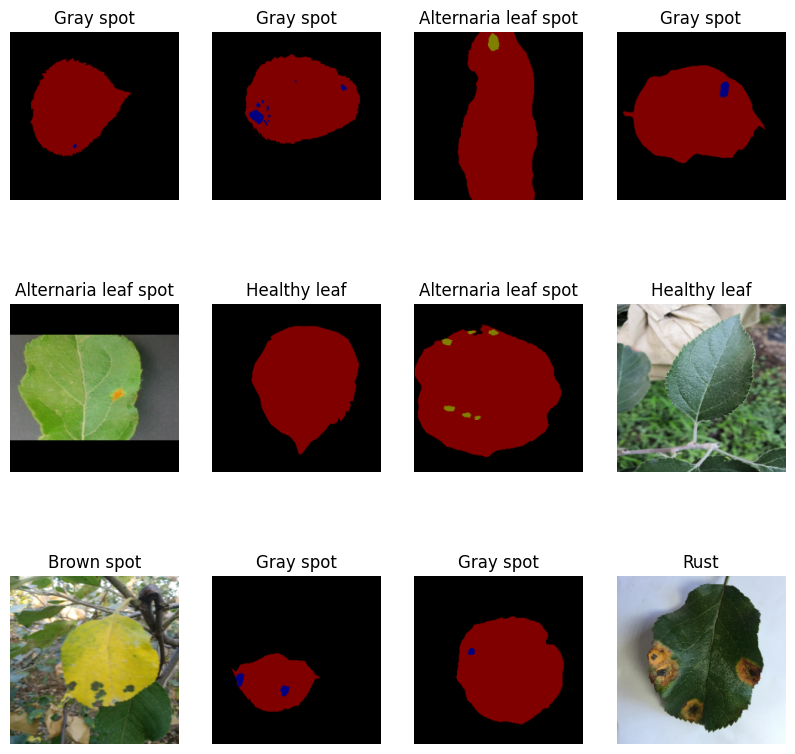

In [6]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [7]:
import skimage
print(skimage.__version__)

0.25.0


In [8]:


# Define GLCM feature extraction function
def extract_glcm_features(image, distances=[1], angles=[0], levels=256):
    """
    Extracts GLCM features from an image.
    Args:
        image (numpy array): Grayscale image
        distances (list): Distances for GLCM calculation
        angles (list): Angles for GLCM calculation
        levels (int): Number of intensity levels in the image
    Returns:
        List of extracted features [contrast, correlation, energy, homogeneity]
    """
    glcm = graycomatrix(image, distances=distances, angles=angles, levels=levels, symmetric=True, normed=True)
    features = [
        graycoprops(glcm, 'contrast')[0, 0],
        graycoprops(glcm, 'correlation')[0, 0],
        graycoprops(glcm, 'energy')[0, 0],
        graycoprops(glcm, 'homogeneity')[0, 0],
    ]
    return features

# TensorFlow dataset parameters
IMAGE_SIZE = 224
BATCH_SIZE = 32

# Load the dataset
dataset = "/Users/kaushikkarmakar/Downloads/ATLDSD"
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset,
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

# Preprocess images: Convert to grayscale and resize
def preprocess_image(image):
    """
    Preprocesses an image: Converts to grayscale and resizes.
    Args:
        image (tf.Tensor): Input image tensor
    Returns:
        Numpy array of the grayscale image
    """
    # Convert to grayscale
    grayscale_image = tf.image.rgb_to_grayscale(image)
    # Resize to original GLCM-supported size
    resized_image = tf.image.resize(grayscale_image, [IMAGE_SIZE, IMAGE_SIZE])
    return np.squeeze(resized_image.numpy().astype('uint8'))

# Process each batch and extract features
data = []
class_names = dataset.class_names  # Get class labels

print("Extracting features from the dataset...")

for batch_images, batch_labels in dataset:
    for i in range(len(batch_images)):
        # Preprocess the image
        preprocessed_image = preprocess_image(batch_images[i])
        # Extract GLCM features
        features = extract_glcm_features(preprocessed_image)
        # Append the features with the corresponding label
        label = class_names[batch_labels[i].numpy()]
        data.append(features + [label])

# Convert the data to a DataFrame
columns = ['contrast', 'correlation', 'energy', 'homogeneity', 'label']
df = pd.DataFrame(data, columns=columns)

# Save the features to a CSV file
output_csv = "glcm_features.csv"
df.to_csv(output_csv, index=False)
print(f"Features saved to {output_csv}")


Found 3282 files belonging to 5 classes.
Extracting features from the dataset...
Features saved to glcm_features.csv


In [9]:
df

,contrast,correlation,energy,homogeneity,label
0,6.015054,0.990884,0.721945,0.983174,Healthy leaf
1,5.983184,0.990688,0.731095,0.983810,Healthy leaf
2,5.940383,0.990935,0.722611,0.983216,Gray spot
3,144.863789,0.972148,0.015095,0.175157,Healthy leaf
4,68.595572,0.990818,0.034719,0.343859,Gray spot
...,...,...,...,...,...
3277,72.188561,0.992464,0.027417,0.338344,Rust
3278,23.887252,0.997115,0.362204,0.589897,Alternaria leaf spot
3279,6.166720,0.991210,0.715341,0.986575,Alternaria leaf spot
3280,4.730221,0.992807,0.724484,0.986223,Healthy leaf


Features saved to glcm_features.csv


# latest dataset 

In [14]:
from skimage.feature import graycomatrix, graycoprops
import numpy as np

# Define GLCM feature extraction function
def extract_glcm_features(image, distances=[1], angles=[0], levels=256):
    """
    Extracts GLCM features from an image.
    Args:
        image (numpy array): Grayscale image
        distances (list): Distances for GLCM calculation
        angles (list): Angles for GLCM calculation
        levels (int): Number of intensity levels in the image
    Returns:
        List of extracted features [contrast, correlation, energy, homogeneity, dissimilarity, entropy, ASM, cluster_shade, cluster_prominence]
    """
    glcm = graycomatrix(image, distances=distances, angles=angles, levels=levels, symmetric=True, normed=True)
    
    # Extracting standard GLCM features
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    
    # Extracting additional GLCM features
    dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
    entropy = -np.sum(glcm * np.log2(glcm + 1e-10))  # Avoid log(0) error
    asm = graycoprops(glcm, 'ASM')[0, 0]  # Angular Second Moment
    cluster_shade = np.sum((np.arange(levels) - np.mean(np.arange(levels))) ** 3 * glcm)
    cluster_prominence = np.sum((np.arange(levels) - np.mean(np.arange(levels))) ** 4 * glcm)
    
    return [contrast, correlation, energy, homogeneity, dissimilarity, entropy, asm, cluster_shade, cluster_prominence]


In [15]:
import cv2

# Extract color-based features
def extract_color_features(image):
    """
    Extracts color features from the image.
    Args:
        image (numpy array): RGB image
    Returns:
        List of color features [mean_r, mean_g, mean_b, std_r, std_g, std_b, mean_hue, mean_saturation, mean_value, std_hue, std_saturation, std_value]
    """
    # Convert the image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    # Extract mean and standard deviation for R, G, B channels
    mean_r = np.mean(image_rgb[:, :, 0])
    mean_g = np.mean(image_rgb[:, :, 1])
    mean_b = np.mean(image_rgb[:, :, 2])
    std_r = np.std(image_rgb[:, :, 0])
    std_g = np.std(image_rgb[:, :, 1])
    std_b = np.std(image_rgb[:, :, 2])
    
    # Convert to HSV for additional color features
    image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2HSV)
    mean_hue = np.mean(image_hsv[:, :, 0])
    mean_saturation = np.mean(image_hsv[:, :, 1])
    mean_value = np.mean(image_hsv[:, :, 2])
    std_hue = np.std(image_hsv[:, :, 0])
    std_saturation = np.std(image_hsv[:, :, 1])
    std_value = np.std(image_hsv[:, :, 2])
    
    return [mean_r, mean_g, mean_b, std_r, std_g, std_b, mean_hue, mean_saturation, mean_value, std_hue, std_saturation, std_value]


In [16]:
from skimage.measure import label, regionprops

# Extract shape-based features
def extract_shape_features(image):
    """
    Extracts shape features from the image.
    Args:
        image (numpy array): Binary image (leaf region)
    Returns:
        List of shape features [area, perimeter, aspect_ratio, eccentricity, circularity, solidity, extent]
    """
    # Label the connected components (leaf region)
    labeled_image = label(image)
    regions = regionprops(labeled_image)
    
    # Assuming there is only one connected component (leaf region)
    if len(regions) > 0:
        region = regions[0]  # Get the largest region (leaf)
        area = region.area
        perimeter = region.perimeter
        aspect_ratio = region.minor_axis_length / region.major_axis_length
        eccentricity = region.eccentricity
        circularity = (4 * np.pi * area) / (perimeter ** 2) if perimeter > 0 else 0
        solidity = area / region.convex_area
        extent = area / region.bbox[2] * region.bbox[3]
        return [area, perimeter, aspect_ratio, eccentricity, circularity, solidity, extent]
    else:
        return [0] * 7  # Return zeros if no region is found


In [17]:
from scipy.stats import skew, kurtosis

# Extract statistical features
def extract_statistical_features(image):
    """
    Extracts statistical features from the image.
    Args:
        image (numpy array): Grayscale image
    Returns:
        List of statistical features [mean, median, variance, skewness, kurtosis]
    """
    mean_intensity = np.mean(image)
    median_intensity = np.median(image)
    variance_intensity = np.var(image)
    skewness_intensity = skew(image.flatten())
    kurtosis_intensity = kurtosis(image.flatten())
    
    return [mean_intensity, median_intensity, variance_intensity, skewness_intensity, kurtosis_intensity]


In [20]:
import tensorflow as tf
import pandas as pd
import numpy as np
from skimage.measure import regionprops
from skimage.filters import threshold_otsu
from skimage import measure

# TensorFlow dataset parameters
IMAGE_SIZE = 224
BATCH_SIZE = 32

# Load the dataset
dataset = "/Users/kaushikkarmakar/Downloads/ATLDSD"
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset,
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 3282 files belonging to 5 classes.


In [21]:
# Preprocess images: Convert to grayscale and resize
def preprocess_image(image):
    """
    Preprocesses an image: Converts to grayscale and resizes.
    Args:
        image (tf.Tensor): Input image tensor
    Returns:
        Numpy array of the grayscale image
    """
    grayscale_image = tf.image.rgb_to_grayscale(image)
    resized_image = tf.image.resize(grayscale_image, [IMAGE_SIZE, IMAGE_SIZE])
    return np.squeeze(resized_image.numpy().astype('uint8'))


In [22]:
# Function to extract shape features
def extract_shape_features(image):
    """
    Extract shape features from the image.
    Args:
        image (numpy array): Grayscale image
    Returns:
        List of shape features: area, perimeter, aspect_ratio, eccentricity, circularity, solidity, extent
    """
    # Threshold the image to obtain binary image
    threshold_value = threshold_otsu(image)
    binary_image = image > threshold_value

    # Label the connected components
    labeled_image = measure.label(binary_image)
    regions = regionprops(labeled_image)

    # Initialize feature values
    area = 0
    perimeter = 0
    aspect_ratio = 0
    eccentricity = 0
    circularity = 0
    solidity = 0
    extent = 0

    # If any regions are found, extract features
    if len(regions) > 0:
        region = regions[0]  # Consider the largest region (or first in case of multiple)
        area = region.area
        perimeter = region.perimeter
        # Check for zero division in aspect_ratio calculation
        aspect_ratio = region.minor_axis_length / region.major_axis_length if region.major_axis_length != 0 else 0
        eccentricity = region.eccentricity
        circularity = (4 * np.pi * area) / (perimeter ** 2) if perimeter > 0 else 0
        solidity = region.solidity
        extent = region.extent

    return [area, perimeter, aspect_ratio, eccentricity, circularity, solidity, extent]


In [23]:
# Process each batch and extract features
data = []
class_names = dataset.class_names  # Get class labels

print("Extracting features from the dataset...")

for batch_images, batch_labels in dataset:
    for i in range(len(batch_images)):
        # Preprocess the image
        preprocessed_image = preprocess_image(batch_images[i])
        
        # Extract all features
        glcm_features = extract_glcm_features(preprocessed_image)
        color_features = extract_color_features(batch_images[i].numpy())
        shape_features = extract_shape_features(preprocessed_image)
        statistical_features = extract_statistical_features(preprocessed_image)

        # Combine all features into a single row
        label = class_names[batch_labels[i].numpy()]
        data.append(glcm_features + color_features + shape_features + statistical_features + [label])



Extracting features from the dataset...


2025-01-20 01:11:33.564445: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [24]:
# Convert the data to a DataFrame
columns = ['contrast', 'correlation', 'energy', 'homogeneity', 'dissimilarity', 'entropy', 'asm', 'cluster_shade', 'cluster_prominence',
           'mean_r', 'mean_g', 'mean_b', 'std_r', 'std_g', 'std_b', 'mean_hue', 'mean_saturation', 'mean_value', 'std_hue', 'std_saturation', 'std_value',
           'area', 'perimeter', 'aspect_ratio', 'eccentricity', 'circularity', 'solidity', 'extent',
           'mean_intensity', 'median_intensity', 'variance_intensity', 'skewness_intensity', 'kurtosis_intensity', 'label']


In [25]:
df = pd.DataFrame(data, columns=columns)

# Save the features to a CSV file
output_csv = "leaf_disease_features.csv"
df.to_csv(output_csv, index=False)
print(f"Features saved to {output_csv}")


Features saved to leaf_disease_features.csv
